In [1]:
from langdetect import detect
import os
import re
from collections import defaultdict

In [2]:
import pandas as pd

data = defaultdict(lambda: {'topic': '', 'content': '', 'messages': []})

for file_path in os.listdir("cleaned_intercom_messages"):
    csv = pd.read_csv(f"cleaned_intercom_messages/{file_path}")
    csv = csv[csv['clean_body'].notna()]
    bodies = csv["clean_body"]
    ids = csv["key_intercomconversation"]
    for id, body in zip(ids, bodies):
        m = re.search(" Selected category: (.+) Content: (.+) uid:", body)
        if m is not None:
            data[id]['topic'] = m.group(1)
            data[id]['content'] = m.group(2)
        else:
            data[id]['messages'].append(body)

df = pd.DataFrame.from_dict(data, orient="index")
print(len(df[df["topic"] == '']))
print(len(df[df["topic"] != '']))

273417
10


In [4]:
df[df["topic"] != '']['messages'].iloc[0]

["question. I wanted to send out a group email. Just want to make sure; For the respondents, there is no difference for them if I sent the emails individually it's simply sending the same email again and again to a group of people, right?",
 "Pipedrive Support Bot here! Ask me any question about Pipedrive and I'll be happy to assist you 😊 Although I am a bot, I'll do as best as I can to solve your queries. If there's something I don't understand I'll direct you to my team members.",
 'You can send an email to large groups of your leads using our Group Emailing function. It is available in the following places: The List View of the Deals tab The List View of the Contacts tab The List View of the Activities tab The Timeline view of the Contacts tab You can select up to one hundred contacts when sending one email. Once multiple contacts are selected in any of the places listed above, the Send group email button will appear. Once you click this button, you will be prompted to provide the r

In [5]:
test_df = df[:10000]

In [39]:
test_df.head()

,topic,content,messages
13672140114,,,"[{{name}} im also talking ot this guy, lll, je..."
13675529033,,,"[Guys, please help the customer when he comes ..."
13675881994,,,[Record a video]
13850823877,,,"[Hello, I'm having trouble connecting Zapier. ..."
13895369856,,,"[View in browser, View in browser]"


In [3]:
import re

In [7]:
"{{name}} is sth".replace("{{.*}}", "")

'{{name}} is sth'

In [8]:
"{{name}} is sth".replace(str(re.match("{{.*}}", "{{name}} is sth")), "")

'{{name}} is sth'

In [9]:
re.sub(r'{{[^}]*}}', '', "{{name}} is {{number}} name").strip(" ")

'is  name'

In [9]:
messages = {}

#for index, row in test_df.iterrows():
for index, row in df.iterrows():
    msg = re.sub(r'{{[^}]*}}', '', " ".join(row['messages']))
    messages[index] = msg

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [12]:
messages[13675529033]

'Guys, please help the customer when he comes back'

In [13]:
len(messages[13672140114])

109

In [5]:
#nltk.download('stopwords')
stop_words = stopwords.words('english')

In [6]:
stop_words.extend(["wo", "n't", "'m", "ca", "'ll", "'re", "'ve", "'d"])

In [25]:
lens = []
for i in messages:
    lens.append(len(messages[i].split()))

In [41]:
import numpy as np
print(np.mean(lens))

414.1917


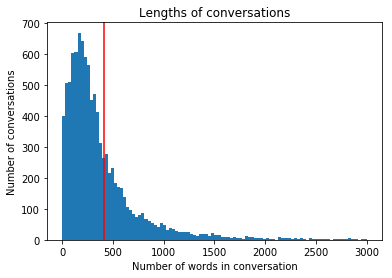

In [45]:
from matplotlib import pyplot as plt

plt.hist(lens, bins=100, range=(1, 3000))
plt.axvline(x=np.mean(lens), color='r', linestyle='-')

plt.title('Lengths of conversations')

plt.xlabel('Number of words in conversation')
plt.ylabel('Number of conversations')

plt.show()

In [10]:
#words = word_tokenize(messages[13850823877])
#words = messages[13850823877].split(" ")
lemmatizer = WordNetLemmatizer()

lemmas = []

for key, value in messages.items():
    words = word_tokenize(value)
    lem = []
    for word in words:
        lemma = lemmatizer.lemmatize(word)
        if len(lemma) > 1:
            lem.append(lemma.lower())
    lem = [w for w in lem if not w in stop_words]
    lemmas.append(lem)
    
#print(lemmas)

In [31]:
import json

with open("lemmas_per_msg.txt", "w", encoding="UTF-8") as f:
    f.write(str(lemmas))

In [39]:
with open("lemmas_per_msg.txt", "r", encoding="UTF-8") as f:
    all_lems = json.loads(f.read())

MemoryError: 

In [14]:
import csv

with open("lemmas_per_message.csv", "w", newline="", encoding="UTF-8") as f:
    writer = csv.writer(f)
    writer.writerows(lemmas)

In [42]:
all_lems = []

for lem_list in lemmas:
    all_lems.extend(lem_list)

In [43]:
len(all_lems)

63879201

In [44]:
from collections import Counter

counter = Counter(all_lems).most_common()

In [48]:
stop_words_from_freq = ["pipedrive", "please", "help", "know", "let", "see", "'s", "need", "would", "question", "``", "day", "get", "one", "possible", "feel", "wa", "''", "ha", "want", "like", "thank", "already", "yes", "ok", "done", "still", "great", "could", "soon", "also", "anything", "well", "right", "sure", "um", "else"]

In [47]:
counter[:100]

[('pipedrive', 780159),
 ('email', 749638),
 ('please', 687356),
 ('de', 584432),
 ('help', 479071),
 ('que', 437400),
 ('know', 429416),
 ('let', 377103),
 ('see', 370987),
 ('user', 361913),
 ('deal', 354809),
 ('need', 348723),
 ("'s", 346158),
 ('support', 339690),
 ('account', 336068),
 ('would', 282750),
 ('question', 282608),
 ('``', 281788),
 ('day', 277061),
 ('get', 275663),
 ('one', 267506),
 ('possible', 263021),
 ('issue', 257077),
 ('free', 256940),
 ('new', 248524),
 ('conversation', 247319),
 ('feel', 247217),
 ('contact', 245144),
 ('case', 240409),
 ('wa', 239596),
 ("''", 236332),
 ('team', 235009),
 ('sync', 231864),
 ('para', 231534),
 ('time', 223488),
 ('ha', 221965),
 ('want', 221313),
 ('like', 213633),
 ('thank', 213049),
 ('message', 210822),
 ('back', 209752),
 ('check', 198139),
 ('already', 183055),
 ('yes', 181922),
 ('por', 181487),
 ('done', 180979),
 ('still', 179809),
 ('great', 179314),
 ('reply', 178924),
 ('se', 177434),
 ('could', 176594),
 ('ok',

In [49]:
new_lemmas = []

for lem_list in lemmas:
    new_lemmas.append([word for word in lem_list if word not in stop_words_from_freq])

In [52]:
with open("new_lems.txt", "w", encoding="UTF-8") as f:
    #for l in new_lemmas:
    f.write(str(new_lemmas))

In [55]:
with open("lemmas_per_msg.txt", "r", encoding="UTF-8") as f:
    all_lems_new = f.read()

MemoryError: 

In [54]:
import csv

with open("new_lems.csv", "w", newline="", encoding="UTF-8") as f:
    writer = csv.writer(f)
    writer.writerows(new_lemmas)

---

In [ ]:
lemmas[7]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
texts = [" ".join(text) for text in lemmas]

In [ ]:
X = vectorizer.fit_transform(texts)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [164]:
lda = LatentDirichletAllocation()

In [165]:
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [173]:
lda.transform(X[:5])

array([[0.00588294, 0.00588363, 0.1753002 , 0.00588639, 0.00588261,
        0.00588392, 0.55635633, 0.22715739, 0.00588237, 0.00588421],
       [0.01429144, 0.01428574, 0.01428746, 0.01429047, 0.01428584,
        0.01428583, 0.87141186, 0.0142899 , 0.01428571, 0.01428575],
       [0.03333527, 0.03333413, 0.03333583, 0.03333419, 0.03333354,
        0.03333423, 0.69998722, 0.03333763, 0.03333333, 0.03333464],
       [0.34859132, 0.00094342, 0.00094344, 0.00094413, 0.00094343,
        0.00094347, 0.51501567, 0.1297883 , 0.00094341, 0.00094342],
       [0.02000186, 0.02000112, 0.02000064, 0.02000008, 0.02000004,
        0.02000004, 0.81999219, 0.0200039 , 0.02      , 0.02000014]])

In [168]:
for i in lemmas[:5]:
    print(i)

['im', 'also', 'talking', 'ot', 'guy', 'lll', 'jejfiabfiabg', 'hm', 'riley', 'young', 'linked', 'se-', 'blank', 'email', 'thread', 'subject']
['guys', 'please', 'help', 'customer', 'come', 'back']
['record', 'video']
['hello', 'trouble', 'connecting', 'zapier', 'drag', 'across', 'email', 'mobile', 'number', 'pipedrive', 'zapier', 'issue', 'time', 'available', 'chat', 'please', 'advise', 'time', 'help', 'desk', 'open', 'australia', 'zapier', 'allow', 'transfer', 'field', 'data', 'first', 'last', 'name', 'phone', 'number', 'email', 'get', 'work', 'terminate', 'pipedrive', 'appears', 'either', 'set', 'person', 'deal', 'reply', 'could', 'find', 'one', 'recent', 'conversation', 'support', 'none', 'related', 'zapier', 'afraid', 'send', 'something', 'proactively', 'without', 'sure', 'leave', 'come', 'back', 'answer', 'automatic', 'work', 'flow', 'template', 'setup', 'please', 'advise', 'change', 'sending', 'email', 'contacting', 'technical', 'question', 'would', 'need', 'check', 'information'

In [172]:
print(lemmas[7])

['need', 'add', 'user', 'pipedrive', 'account', 'reaching', 'pipedrive', 'support', 'please', 'find', 'information', 'add', 'user', 'checking', 'see', 'question', 'require', 'help', 'please', 'feel', 'free', 'reply', 'open', 'new', 'conversation', 'get', 'touch', 'another', 'support', 'member', 'great', 'day']


---

In [1]:
import nltk

In [2]:
#nltk.download('crubadan')
tc = nltk.classify.textcat.TextCat() 

In [4]:
!pip install pycountry

  Stored in directory: C:\Users\Birgit\AppData\Local\pip\Cache\wheels\33\4e\a6\be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [5]:
import pycountry

In [11]:
naide = df[df["topic"] != '']['messages'].iloc[0]
naide

["question. I wanted to send out a group email. Just want to make sure; For the respondents, there is no difference for them if I sent the emails individually it's simply sending the same email again and again to a group of people, right?",
 "Pipedrive Support Bot here! Ask me any question about Pipedrive and I'll be happy to assist you 😊 Although I am a bot, I'll do as best as I can to solve your queries. If there's something I don't understand I'll direct you to my team members.",
 'You can send an email to large groups of your leads using our Group Emailing function. It is available in the following places: The List View of the Deals tab The List View of the Contacts tab The List View of the Activities tab The Timeline view of the Contacts tab You can select up to one hundred contacts when sending one email. Once multiple contacts are selected in any of the places listed above, the Send group email button will appear. Once you click this button, you will be prompted to provide the r

In [12]:
len(naide)

106

In [21]:
import time
start_time = time.time()

languages = []

for n in naide:
    #print(type(n))
    guess_one = tc.guess_language(n)
    guess_one_name = pycountry.languages.get(alpha_3=guess_one)
    if guess_one_name is None:
        continue
    languages.append(guess_one_name.name)
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 57.480953216552734 seconds ---


In [30]:
start_time2 = time.time()

languages2 = []

for n in naide:
    try:
        lang = detect(n)
        languages2.append(lang)
    except:
        continue
    
print("--- %s seconds ---" % (time.time() - start_time2))

--- 0.600996732711792 seconds ---
